# Titanic Competition

Upvote my work if you found it useful.

I got the idea for the time series analysis below from the following:
-https://www.kaggle.com/code/melodyyiphoiching/titanic-machine-learning-from-disaster/edit
- MANAV SEHGAL(https://www.kaggle.com/code/startupsci/titanic-data-science-solutions)
- SAS - Example: Model Titanic Survival (https://documentation.sas.com/doc/en/vdmmlcdc/8.1/caspg3/n0c8k27l2vkwlin196w5qptqsjqx.htm)
- AYSE BAT (https://www.kaggle.com/code/aaysbt/titanic-datasets-eda-fe-dc-model-predictions)
- LD FREEMAN (https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy#Step-7:-Optimize-and-Strategize)


## Challenge

Build a predictive model that answers the question: "what sorts of people were more likely to survive the Titanic sinking?"


## Data 
To take a look at the competition data, click on the Data tab at the top of the competition page. Then, scroll down to find the list of files.
There are three files in the data: (1) train.csv, (2) test.csv, and (3) gender_submission.csv.

| Column Name - customers.csv | Description |
|:--|:--|
| Survival | Survival (0 = No; 1 = Yes). Not included in test.csv file | 
| Pclass |  Ticket Class/ A Proxy for socio-economic status(SES) (1 = 1st/Upper ; 2 = 2nd/Middle; 3 = 3rd/Lower) | 
| Name | Name |
| Sex | Sex |
| Age | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 |
| Sibsp | Number of Siblings (brother, sister, stepbrother, stepsister) /Spouses (husband, wife (mistresses and fiancés were ignored)) Aboard |
| Parch | Number of Parents (mother, father)/Children (daughter, son, stepdaughter, stepson) Aboard; Some children travelled only with a nanny, therefore parch=0 for them. |
| Ticket | Ticket Number |
| Fare | Passenger Fare |
| Cabin | Cabin |
| Embarked | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) |


## Workflow stages

The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. [Question or problem definition](#ch1)
2. [Wrangle, prepare, cleanse the data](#ch2)
3. [EDA (Exploratory Data Analysis) - Analyze, identify patterns, and explore the data](#ch3)
4. [Acquire training and testing data](#ch4)
5. [Model, predict and solve the problem](#ch5)
6. [Visualize, report, and present the problem solving steps and final solution](#ch6)
7. [Supply or submit the results](#ch7)

In [140]:
# linear algebra
import numpy as np 

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
# mpl.style.use('ggplot')
# sns.set_style('white')
# pylab.rcParams['figure.figsize'] = 12,8

-------------------------


<a id="ch1"></a>
### 1. Question or problem definition 

The competition is simple: Use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.



#### Get the data

In [141]:
# Get the data
import pandas as pd 
import os

base_path = r"C:\Users\prana\Desktop\Uni\Sem 5\AI_Hackathon\Notebooks\Data"

train_path = os.path.join(base_path, "train.csv")
test_path = os.path.join(base_path, "test.csv")

# Load datasets
df = pd.read_csv(train_path)
sub_df = pd.read_csv(test_path)

df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

There are 11 features and one target variable (survived). 

**"PassengerId"**, **"Ticket"** and **"Name"** would be highly correlated with the survival rate as they are unique values for each customer. However, they are too specific to be used for modeling. We need to generalize these fields.

In [142]:
print('Descriptive statistics of train_df:\n')
df.describe(include = 'all')

Descriptive statistics of train_df:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [143]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
sub_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [145]:
df.shape, sub_df.shape

((891, 12), (418, 11))


The values in the second column (**"Survived"**) can be used to determine whether each passenger survived or not: 

- if it's a "1", the passenger survived.
- if it's a "0", the passenger died.

<a id="ch2"></a>
### 2. Wrangle, prepare, cleanse the data

---- Start the data cleaning----

We need to make sure the data is clean before starting your analysis. As a reminder, we should check for:

- Duplicate records
- Consistent formatting
- Missing values
- Obviously wrong values (x)

#### Duplicate Records
How many duplicate transaction records are there?

In [146]:
#Find the number duplicate record
print('df - Number of duplicate Record:', df.duplicated().sum())

print('sub_df - Number of duplicate Record:', sub_df.duplicated().sum())


df - Number of duplicate Record: 0
sub_df - Number of duplicate Record: 0


#### Missing Values
How many missing values are there?

In [147]:
#Find the number of null per each columns
print('Columns in df with null values:\n')
print(df)
print("-"*30)

print('Columns in sub_df with null values:\n')
print(sub_df.isnull().sum())
print("-"*30)

Columns in df with null values:

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                  

In [148]:
combine = [df, sub_df]

#### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [149]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


There is misssing value in Age, Cabin and Embarked.

#### Handle missing value - numerical continuous variable

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2

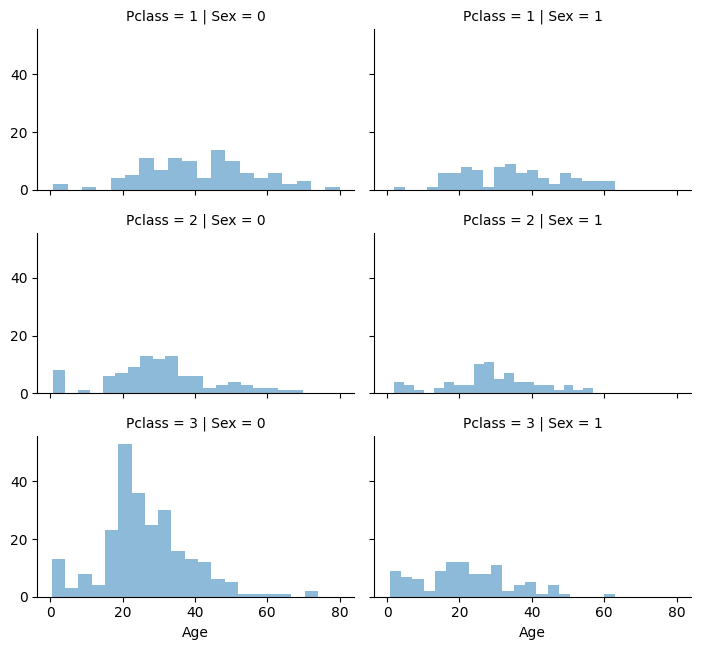

In [150]:
grid = sns.FacetGrid(df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [151]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [152]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


#### Handle missing value - categorical variable
Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [153]:
#Find the value count of train_df['Embarked']
print('Value count of Embarked variable in train_df:\n')
print(df['Embarked'].value_counts())
print("-"*30)

# Find the mode of train_df['Embarked']
freq_port = df.Embarked.dropna().mode()[0]
print('Mode of Embarked variable in train_df: ',freq_port)

Value count of Embarked variable in train_df:

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
------------------------------
Mode of Embarked variable in train_df:  S


In [154]:
#Fill the null value of Embarked with the most common occurance

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [155]:
#Converting categorical feature to numeric

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({"S": 1, "C": 2, "Q": 3})
    
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,1


#### Handle missing value in Fare
Fare feature is fractional value. Our training dataset has one missing values. We simply fill these with the mean.

In [156]:
for dataset in combine:
    dataset['Fare'].fillna(dataset['Fare'].dropna().mean(), inplace=True)
    dataset['Fare'] = dataset['Fare'].astype(np.int64)

### Creating new feature extracting from existing (Add Computed Column)

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern `(\w+\.)` matches the first word which ends with a dot character within Name feature. The `expand=False` flag returns a DataFrame.

**Observations.**

When we plot Title, Age, and Survived, we note the following observations.

- Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
- Survival among Title Age bands varies slightly.
- Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

**Decision.**

- We decide to retain the new Title feature for model training.

In [157]:
for dataset in combine:
    dataset['Title']  = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [158]:
pd.crosstab(df["Title"], sub_df['Sex'])

Sex,0,1
Title,,
Don,1,0
Dr,3,0
Master,14,9
Miss,64,37
Mme,1,0
Mr,145,83
Mrs,37,21
Rev,1,2


We can replace many titles with a more common name or classify them as Rare.

In [159]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [160]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    dataset['Title'] = dataset['Title'].fillna(0)
    
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,NaN,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,2,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,1,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,NaN,1,1


#### Handle missing value -  Highly incomplete (Cabin)
A computed column, Deck, is created because it is slightly more general than Cabin.


In [161]:
for dataset in combine:
    dataset['Deck'] = dataset['Cabin'].str.slice(0,1) 
    dataset['Deck'] = dataset['Deck'].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F":6,"G":7, "T":8})
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(np.int64)

In [162]:
#Find the number of null per each columns
print('Columns in df with null values:\n')
print(df.isnull().sum())
print("-"*30)

print('Columns in sub_df with null values:\n')
print(sub_df.isnull().sum())
print("-"*30)

Columns in df with null values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Deck             0
dtype: int64
------------------------------
Columns in sub_df with null values:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Deck             0
dtype: int64
------------------------------


#### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [163]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [164]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

#### Drop Useless Column

The **Name, PassengerId**, **Ticket** and **Cabin** should not have a bearing on the analysis. We also do not need the PassengerId feature in the training dataset

Now we can safely drop the **Name, PassengerId** and **Ticket** feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset

In [165]:
#Duplicate variable - Fare & Age
# for dataset in combine:       
#     dataset['FareB'] = dataset['Fare']
#     dataset['AgeB'] = dataset['Age']

In [166]:
#Binning variable - Fare & Age 
for dataset in combine:       
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [167]:
# for dataset in combine:
#     dataset.loc[ dataset['FareB'] <= 7.91, 'FareB'] = 0
#     dataset.loc[(dataset['FareB'] > 7.91) & (dataset['FareB'] <= 14.454), 'FareB'] = 1
#     dataset.loc[(dataset['FareB'] > 14.454) & (dataset['FareB'] <= 31), 'FareB']   = 2
#     dataset.loc[ dataset['FareB'] > 31, 'FareB'] = 3
#     dataset['FareB'] = dataset['FareB'].astype(int)

combine = [df, sub_df]
    
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,FamilySize,IsAlone,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,NaN,1,1,0,2,0,"(-0.001, 7.0]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,2,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,1,2,0,1,1,"(-0.001, 7.0]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,1,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,NaN,1,1,0,1,1,"(7.0, 14.0]","(32.0, 48.0]"
5,6,0,3,"Moran, Mr. James",0,25,0,0,330877,8,NaN,3,1,0,1,1,"(7.0, 14.0]","(16.0, 32.0]"
6,7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51,E46,1,1,5,1,1,"(31.0, 512.0]","(48.0, 64.0]"
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21,NaN,1,4,0,5,0,"(14.0, 31.0]","(-0.08, 16.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11,NaN,1,3,0,3,0,"(7.0, 14.0]","(16.0, 32.0]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30,NaN,2,3,0,2,0,"(14.0, 31.0]","(-0.08, 16.0]"


In [168]:
for dataset in combine:
    #Fare Bins/Buckets using qcut or frequency bins
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    #Age Bins/Buckets using cut or value bins
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [169]:
# for dataset in combine:    
#     dataset.loc[ dataset['AgeB'] <= 16, 'AgeB'] = 0
#     dataset.loc[(dataset['AgeB'] > 16) & (dataset['AgeB'] <= 32), 'AgeB'] = 1
#     dataset.loc[(dataset['AgeB'] > 32) & (dataset['AgeB'] <= 48), 'AgeB'] = 2
#     dataset.loc[(dataset['AgeB'] > 48) & (dataset['AgeB'] <= 64), 'AgeB'] = 3
#     dataset.loc[ dataset['AgeB'] > 64, 'AgeB'] = 4
# train_df.head()

combine = [df, sub_df]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,FamilySize,IsAlone,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,NaN,1,1,0,2,0,"(-0.001, 7.0]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,2,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,1,2,0,1,1,"(-0.001, 7.0]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,1,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,NaN,1,1,0,1,1,"(7.0, 14.0]","(32.0, 48.0]"


#### Convert Formats
We will convert categorical data to dummy variables for mathematical analysis. There are multiple ways to encode categorical variables; we will use the sklearn and pandas functions.

In this step, we will also define our x (independent/features/explanatory/predictor/etc.) and y (dependent/target/outcome/response/etc.) variables for data modeling.

In [170]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in combine:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    

#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(df[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 



,Sex,Pclass,Embarked,Title,SibSp,Parch,Age,Fare,FamilySize,IsAlone
0,0,3,1,1,1,0,22,7,2,0
1,1,1,2,3,1,0,38,71,2,0
2,1,3,1,2,0,0,26,7,1,1
3,1,1,1,3,1,0,35,53,2,0
4,0,3,1,1,0,0,35,8,1,1


In [171]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
sub_df = sub_df.drop(['Name','Ticket','Cabin'], axis=1)

combine = [df, sub_df]
df.shape, sub_df.shape

((891, 19), (418, 19))

In [172]:
## check for data type
print("Training Data:\n")
df.head()

Training Data:



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,FamilySize,IsAlone,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,0,22,1,0,7,1,1,0,2,0,"(-0.001, 7.0]","(16.0, 32.0]",0,0,0,1,0
1,1,1,1,38,1,0,71,2,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]",1,1,2,2,3
2,1,3,1,26,0,0,7,1,2,0,1,1,"(-0.001, 7.0]","(16.0, 32.0]",1,0,1,1,0
3,1,1,1,35,1,0,53,1,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]",1,0,2,2,3
4,0,3,0,35,0,0,8,1,1,0,1,1,"(7.0, 14.0]","(32.0, 48.0]",0,0,0,2,1


In [173]:
## check for data type
print("Testing Data:\n")
df.head()

Testing Data:



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,FamilySize,IsAlone,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,0,22,1,0,7,1,1,0,2,0,"(-0.001, 7.0]","(16.0, 32.0]",0,0,0,1,0
1,1,1,1,38,1,0,71,2,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]",1,1,2,2,3
2,1,3,1,26,0,0,7,1,2,0,1,1,"(-0.001, 7.0]","(16.0, 32.0]",1,0,1,1,0
3,1,1,1,35,1,0,53,1,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]",1,0,2,2,3
4,0,3,0,35,0,0,8,1,1,0,1,1,"(7.0, 14.0]","(32.0, 48.0]",0,0,0,2,1


<a id="ch3"></a>
### 3. EDA (Exploratory Data Analysis) - Analyze, identify patterns, and explore the data Analysis

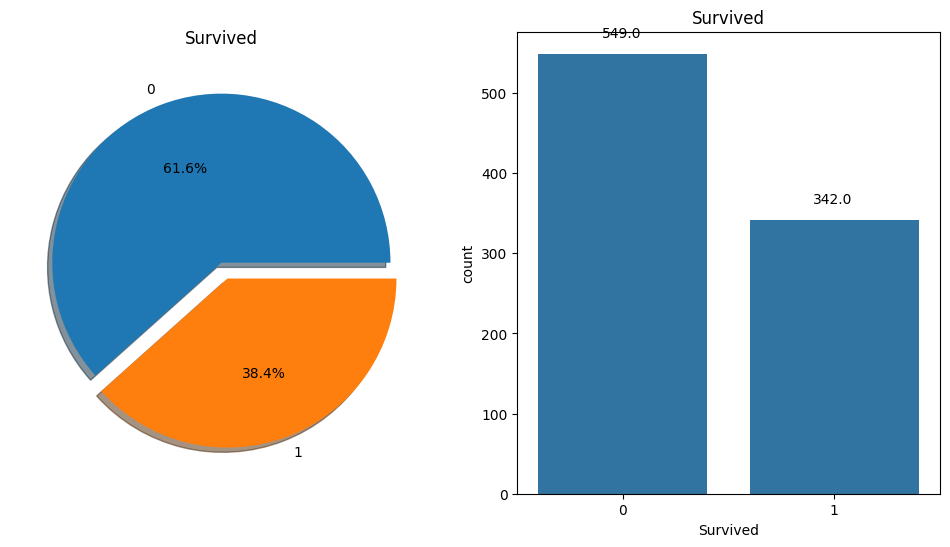

In [174]:
import matplotlib.pyplot as plt

#Survived rate

#Pie Chart
f,ax=plt.subplots(1,2,figsize=(12,6))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

#Bar chart - count
sns.countplot(x='Survived',data=df,ax=ax[1])
ax[1].set_title('Survived')

for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))


plt.show()


- The plots show that number of passengers survived the accident. 
- Only 350 out of 891 passengers (38.4%) survived in the training set. 

'female': 1, 'male': 0

In [175]:
eda_df = df.copy()
eda_df['Sex'] =  eda_df['Sex'].map( { 0: 'male',1:'female'} )
eda_df['Deck'] =  eda_df['Deck'].map( {0: 'Missing', 1: 'A', 2: 'B',3:'C',4:'D',5:'E',6:'F',7:'G',8:'T'} )
eda_df['Embarked'] =  eda_df['Embarked'].map( {0: 'Missing', 1: 'S', 2: 'C',3:'Q'} )
eda_df['Title'] =  eda_df['Title'].map( {0: 'Missing', 1: 'Mr', 2: 'Miss',3:'Mrs',4:'Master',5:'Rare'} )
# eda_df['Survived'] =  eda_df['Survived'].map( {0: 'No',1:'Yes'} )
eda_df['Pclass'] =  eda_df['Pclass'].map( {0: 'Missing',1:'Upper',2:'Middle',3:'Lower'} )
eda_df['IsAlone'] =  eda_df['IsAlone'].map( {0: 'No',1:'Yes'} )

In [176]:
import seaborn as sns

fig1 = eda_df.groupby(['Sex', 'Survived'])['Survived'].count().unstack().fillna(0)
fig2 = eda_df.groupby(['Pclass', 'Survived'])['Survived'].count().unstack().fillna(0)
fig3 = eda_df.groupby(['IsAlone', 'Survived'])['Survived'].count().unstack().fillna(0)
fig4 = eda_df.groupby(['Embarked', 'Survived'])['Survived'].count().unstack().fillna(0)

In [177]:

colors = ['#2471A3', '#F5B041']

def stacked_barchart(fig,ax):
    bottom = np.zeros(len(fig))

    for i, col in enumerate(fig.columns):
        ax.bar(
          fig.index, fig[col], bottom=bottom, label=col, color=colors[i])
        bottom += np.array(fig[col])

    totals = fig.sum(axis=1)
    y_offset = 4
    for i, total in enumerate(totals):
        ax.text(totals.index[i], total + y_offset, round(total), ha='center',
              weight='bold')
        
    # Let's put the annotations inside the bars themselves by using a
    # negative offset.
    y_offset = -40

    # For each patch (basically each rectangle within the bar), add a label.
    for bar in ax.patches:
        ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.  
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height() + bar.get_y() + y_offset,
          # This is actual value we'll show.
          round(bar.get_height()),
          # Center the labels and style them a bit.
          ha='center',
          color='w',
          weight='bold',
          size=8
      )


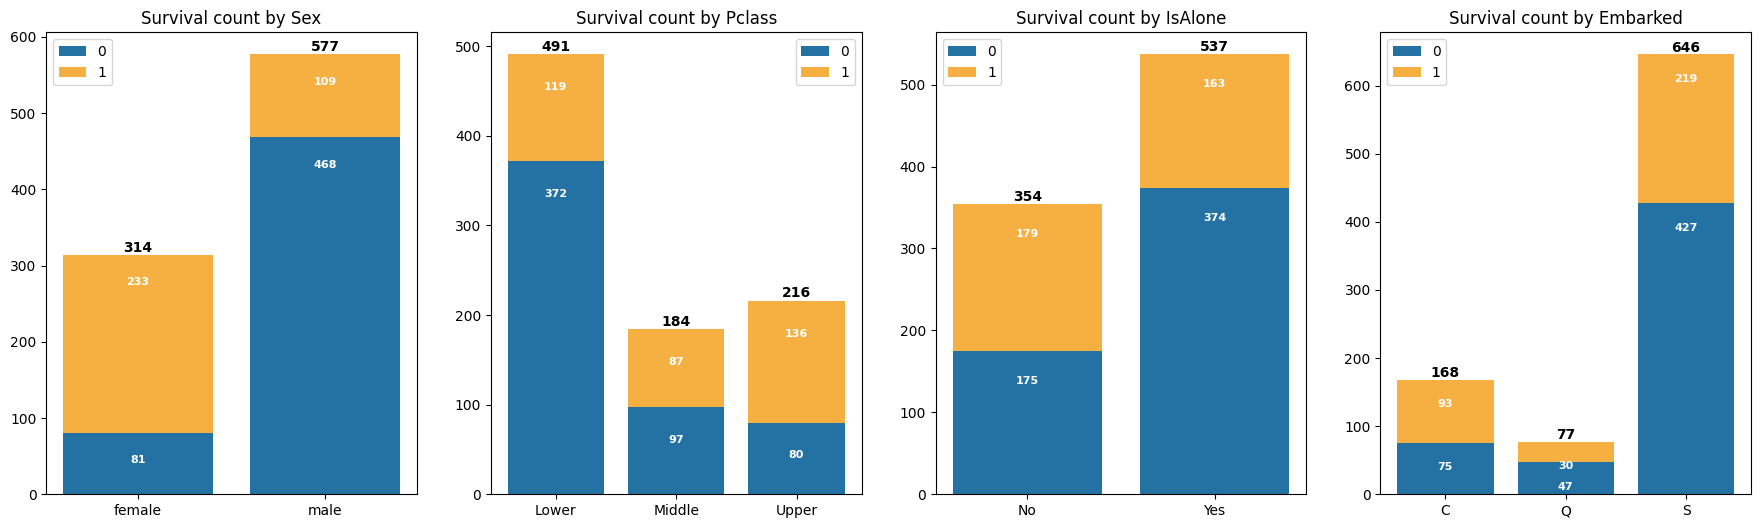

In [178]:
fig,ax=plt.subplots(1,4,figsize=(22,6))

stacked_barchart(fig1,ax[0])
ax[0].set_title('Survival count by Sex')
ax[0].legend()

stacked_barchart(fig2,ax[1])
ax[1].set_title('Survival count by Pclass')
ax[1].legend()

stacked_barchart(fig3,ax[2])
ax[2].set_title('Survival count by IsAlone')
ax[2].legend()

stacked_barchart(fig4,ax[3])
ax[3].set_title('Survival count by Embarked')
ax[3].legend()

plt.show()

In [179]:
display(df[['AgeBin', 'Survived']].groupby(['AgeBin'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze FamilySize feature with survived
display(df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze Pclass feature with survived
display(df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze sex feature with survived
display(df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze SibSp feature with survived
display(df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze Parch feature with survived
display(df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze IsAlone feature with survived
display(df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False))

,AgeBin,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
4,"(64.0, 80.0]",0.090909


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


,Sex,Survived
1,1,0.742038
0,0,0.188908


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


##### Sex
- The number of men on board the ship is much higher than the number of women, but the number of women saved is more than twice that of the number of males survived.
- The survival rates for a women on the ship is around 75% while that for men in around 19%.

##### Pclass
- Passenegers Of Pclass 1 has a very high priority to survive.
- The number of Passengers in Pclass 3 were a lot higher than Pclass 1 and Pclass 2, but still the number of survival from pclass 3 is low compare to them.
- Pclass 1 %survived is around 63%, for Pclass2 is around 48%, and Pclass3 survived is around 25%

In [180]:
pd.crosstab([eda_df.Sex,eda_df.Survived],eda_df.Pclass,margins=True)

Pclass           Lower  Middle  Upper  All
Sex    Survived                           
female 0            72       6      3   81
       1            72      70     91  233
male   0           300      91     77  468
       1            47      17     45  109
All                491     184    216  891

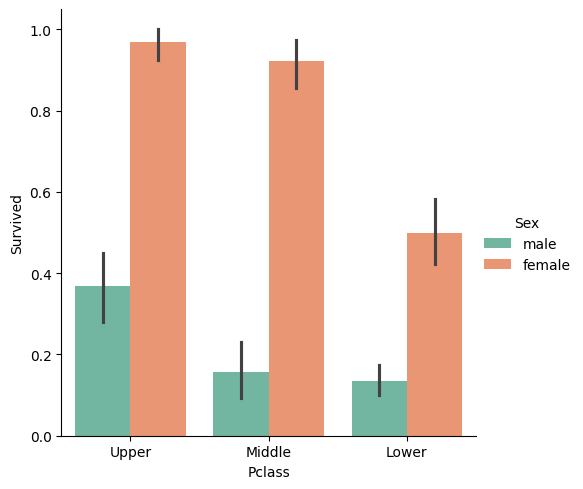

In [181]:
sns.catplot(
    x="Pclass",
    y="Survived",
    hue="Sex",
    data=eda_df,
    palette="Set2",
    order=["Upper", "Middle", "Lower"],
    kind="bar"
)

plt.show()


- Female from Upper class is about 95-96% survived. Only 3 out of 94 Women from Upper class died.
- Female Upper class has high priority to survive
- Lower class female has more survived rate than Upper class male.

#### Features Correlation with Survived:

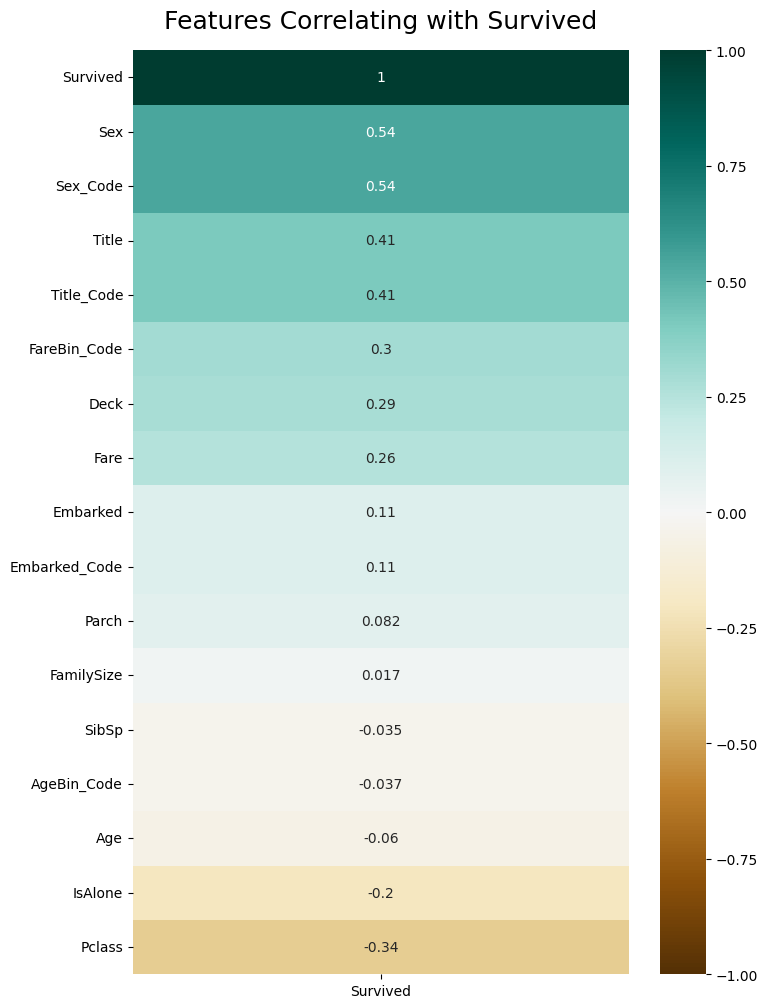

In [182]:
plt.figure(figsize=(8, 12))

# only numeric columns for correlation
numeric_corr = df.select_dtypes(include=["number"]).corr()

heatmap = sns.heatmap(
    numeric_corr[['Survived']].sort_values(by='Survived', ascending=False),
    vmin=-1, vmax=1, annot=True, cmap='BrBG'
)

heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize':18}, pad=16)
plt.show()


- Sex is positively corrlated with Survived (with a Person's correlation coefficient of 0.54) ; Female is more likely to survive
- Pclass is negatively correlated with Survived(with a Pearson’s correlation coefficient of -0.34) ; Obviously, better the ticket class (1 = 1st/Upper ; 2 = 2nd/Middle; 3 = 3rd/Lower), higher the chance of survival.

- Those important feature for prediction the Survived people



#### Correlation between features:

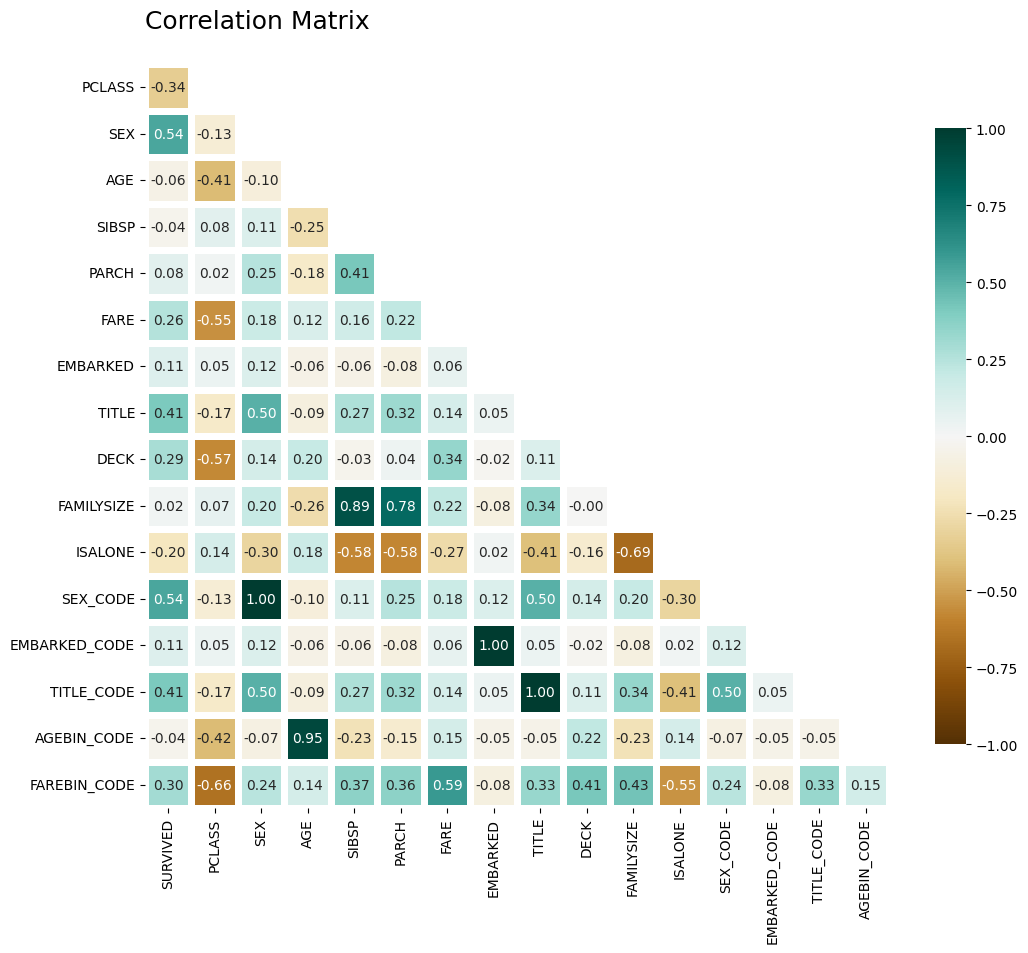

In [184]:
# get correlations
df_corr = df.select_dtypes(include=["number"]).corr()

fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# color map
# cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap='BrBG', vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'Correlation Matrix\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

According to the analysis, passengers were more likely to survive if:

- they had a high class ticket
- they were women
- they were young
- they embarked from Cherbourg

On the contrary, being a third class old man from Southampton lowered your chances of survival.

In [185]:
df = df.drop(['AgeBin'], axis=1)
df = df.drop(['FareBin'], axis=1)
sub_df = sub_df.drop(['AgeBin'], axis=1)
sub_df = sub_df.drop(['FareBin'], axis=1)

<a id="ch4"></a>
### 4. Acquire training and testing data

In [186]:
X_train = df.drop("Survived", axis=1)
Y_train = df["Survived"]
X_test  = sub_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 16), (891,), (418, 16))

<a id="ch5"></a>
### 5. Model, predict and solve the problem

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

Logistic Regression
KNN or k-Nearest Neighbors
Support Vector Machines
Naive Bayes classifier
Decision Tree
Random Forrest
Perceptron
Artificial neural network
RVM or Relevance Vector Machine

#### Split Training and Testing Data

In [187]:
#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 



In [188]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(df[data1_x_calc], df[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(df[data1_x_bin], df[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], df[Target], random_state = 0)


print("Data1 Shape: {}".format(df.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 17)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,0,3,0,0,1,1,0
68,1,3,0,1,7,1,0
253,0,3,0,0,2,1,2
320,0,3,0,0,1,1,0
706,1,2,0,2,1,2,1


In [189]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = df[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, df[data1_x_bin], df[Target], cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(df[data1_x_bin], df[Target])
    MLA_predict[MLA_name] = alg.predict(df[data1_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict


,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.893071,0.828731,0.053086,0.267215
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.889139,0.828731,0.065166,0.367297
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.867228,0.828358,0.038453,0.284848
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.834457,0.827612,0.048484,0.049774
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.868352,0.826119,0.051346,0.151814
1,BaggingClassifier,"{'bootstrap': True, 'bootstrap_features': Fals...",0.888015,0.823134,0.060943,0.040264
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.893071,0.822388,0.073948,0.200282
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.829213,0.822388,0.051832,0.051471
0,AdaBoostClassifier,"{'algorithm': 'deprecated', 'estimator': None,...",0.828277,0.818657,0.070478,0.123369
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.855431,0.814552,0.060084,0.00557


Text(0, 0.5, 'Algorithm')

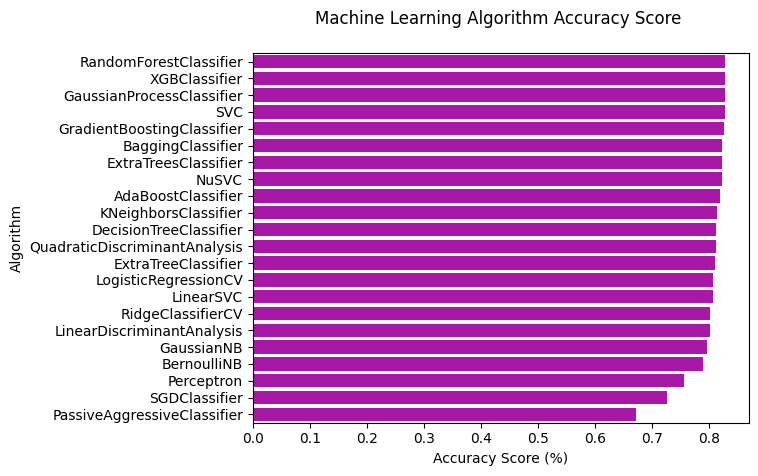

In [190]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

#### Rank the model
We can use binary cross entropy or logistic loss as the loss function and any metric like accuracy or/and ROC AUC score as a metric to evaluate the results.

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [191]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# fit model
model = XGBClassifier()
model.fit(X_train, Y_train)
# make predictions for test data
Y_pred = model.predict(X_test)

<a id="ch6"></a>
### 6. Visualize, report, and present the problem solving steps and final solution

<a id="ch7"></a>
### 7. Submit the results

In [192]:
submission = pd.DataFrame({
        "PassengerId": sub_df["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [195]:
from sklearn.metrics import accuracy_score

# Load both CSVs

base_path = r"C:\Users\prana\Desktop\Uni\Sem 5\AI_Hackathon\Notebooks"

truth = pd.read_csv(os.path.join(base_path, "Data\gender_submission.csv"))
preds = pd.read_csv(os.path.join(base_path, "submission.csv"))

# Merge on PassengerId to align rows properly
merged = pd.merge(truth, preds, on="PassengerId", suffixes=("_true", "_pred"))

# Calculate accuracy
acc = accuracy_score(merged["Survived_true"], merged["Survived_pred"])
print(f"Model Accuracy: {acc*100:.2f}%")


Model Accuracy: 80.86%


In [196]:
# ==========================================
# FINAL MODEL TRAINING AND PICKLING
# ==========================================
import pickle

# Select the best performing model based on results
print("Training final RandomForestClassifier model...")

# Use the same features that were used in your model comparison
# Based on your notebook, these appear to be the final feature columns
feature_columns = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 
                  'FamilySize', 'AgeBin_Code', 'FareBin_Code']

# Prepare final training data
X_train_final = df[feature_columns].copy()
y_train_final = df['Survived'].copy()

# Train the final RandomForest model with optimized parameters
final_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Fit the model
final_model.fit(X_train_final, y_train_final)

# Print model performance on training data
train_score = final_model.score(X_train_final, y_train_final)
print(f"Final model training accuracy: {train_score:.4f}")

# Save the model as 'simple_titanic_model.pkl' to match your frontend
model_filename = 'simple_titanic_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(final_model, f)

print(f"\n✅ Model successfully saved as '{model_filename}'")
print(f"📊 Model type: {type(final_model).__name__}")
print(f"🎯 Expected input features: {feature_columns}")
print(f"📈 Training accuracy: {train_score:.4f}")

# Verify the model can be loaded
try:
    with open(model_filename, 'rb') as f:
        loaded_model = pickle.load(f)
    print(f"✅ Model verification: Successfully loaded and ready for frontend use!")
except Exception as e:
    print(f"❌ Error loading model: {e}")


Training final RandomForestClassifier model...
Final model training accuracy: 0.8429

✅ Model successfully saved as 'simple_titanic_model.pkl'
📊 Model type: RandomForestClassifier
🎯 Expected input features: ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
📈 Training accuracy: 0.8429
✅ Model verification: Successfully loaded and ready for frontend use!
